# Binary Classification
Apply deep learning to another common task.

# 🧠 Neural Networks for Binary Classification

So far in this course, we've learned how neural networks can solve **regression** problems. Now, we’re diving into another major use case: **classification**. Most of what we’ve learned still applies — but there are key differences in the output layer and the loss function.

---

## 🔢 Binary Classification

Classification into two classes is very common in ML. A few examples:
- Will a customer make a purchase? 🛍️
- Is this transaction fraudulent? 💳
- Is there a planet in the signal? 🪐
- Does a test show evidence of disease? 🧬

All of these are **binary classification** problems.

Before training, we convert class labels (e.g., "Yes"/"No") into **0 or 1**. This way, the neural network can work with the data numerically.

---

## 🎯 Accuracy and Cross-Entropy

**Accuracy** is a common metric in classification:

```
accuracy = number_correct / total_predictions
```

But there's a catch:  
⛔ Accuracy **can’t** be used as a loss function in SGD, because it’s not smooth — it changes in jumps. Neural networks need a **smooth** loss to optimize.

### ✅ Cross-Entropy to the Rescue

For classification tasks, we use **cross-entropy** as our loss function. It measures the "distance" between the predicted probability distribution and the true labels.

Think of it as:
- The closer the predicted probability is to **1.0** for the correct class, the **lower** the loss.
- Incorrect predictions (especially confident wrong ones) are penalized **heavily**.

> 🎯 Cross-entropy is ideal for classification, especially with SGD.
> Improving it will usually improve our accuracy as well.

---

## 📈 Probabilities via Sigmoid Activation

Since cross-entropy expects **probabilities**, we need a way to turn the outputs of a dense layer (real numbers) into values between 0 and 1. That’s where the **sigmoid function** comes in.

### 🔁 Sigmoid Function

The sigmoid squashes any real number into the interval [0, 1], forming an 'S'-shaped curve:

```
sigmoid(x) = 1 / (1 + exp(-x))
```

This allows us to treat the output as a **probability**.

### 🔍 Predicting Classes

Once you have a probability:
- If it's **≥ 0.5**, predict class **1**
- If it's **< 0.5**, predict class **0**

This 0.5 threshold is the **default** in Keras when using accuracy.

---

## 🧪 Summary

| Concept              | Purpose                                       |
|----------------------|-----------------------------------------------|
| ✅ Accuracy           | Metric to evaluate performance                |
| ❌ Not a loss function| Too "jumpy" for gradient descent              |
| 🔥 Cross-Entropy      | Loss function for classification              |
| 📉 Penalizes bad probs| Encourages high confidence in correct class   |
| 🌀 Sigmoid Activation | Converts real numbers → probabilities [0,1]   |

** 👨‍🏫 **:  
Use `sigmoid` activation + `binary_crossentropy` loss for binary classification.
Accuracy will follow. 🚀
```

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

hotel = pd.read_csv('dl-course-data/hotel.csv')

X = hotel.copy()
y = X.pop('is_canceled')

X['arrival_date_month'] = \
    X['arrival_date_month'].map(
        {'January':1, 'February': 2, 'March':3,
         'April':4, 'May':5, 'June':6, 'July':7,
         'August':8, 'September':9, 'October':10,
         'November':11, 'December':12}
    )

features_num = [
    "lead_time", "arrival_date_week_number",
    "arrival_date_day_of_month", "stays_in_weekend_nights",
    "stays_in_week_nights", "adults", "children", "babies",
    "is_repeated_guest", "previous_cancellations",
    "previous_bookings_not_canceled", "required_car_parking_spaces",
    "total_of_special_requests", "adr",
]
features_cat = [
    "hotel", "arrival_date_month", "meal",
    "market_segment", "distribution_channel",
    "reserved_room_type", "deposit_type", "customer_type",
]

transformer_num = make_pipeline(
    SimpleImputer(strategy="constant"), # there are a few missing values
    StandardScaler(),
)
transformer_cat = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(handle_unknown='ignore'),
)

preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat, features_cat),
)

# stratify - make sure classes are evenlly represented across splits
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

input_shape = [X_train.shape[1]]

# 1) Define Model #


In [2]:
from tensorflow import keras
from tensorflow.keras import layers

# Define the model given in the diagram
model =  keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.3),
    layers.Dense(1, activation='sigmoid')
])



c:\Users\samad\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# 2) Add Optimizer, Loss, and Metric #


Epoch 1/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - binary_accuracy: 0.7368 - loss: 0.5407 - val_binary_accuracy: 0.8069 - val_loss: 0.4452
Epoch 2/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - binary_accuracy: 0.8035 - loss: 0.4230 - val_binary_accuracy: 0.8129 - val_loss: 0.4052
Epoch 3/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - binary_accuracy: 0.8084 - loss: 0.4113 - val_binary_accuracy: 0.8147 - val_loss: 0.3978
Epoch 4/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - binary_accuracy: 0.8108 - loss: 0.4032 - val_binary_accuracy: 0.8181 - val_loss: 0.3922
Epoch 5/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - binary_accuracy: 0.8154 - loss: 0.3987 - val_binary_accuracy: 0.8200 - val_loss: 0.3867
Epoch 6/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - binary_accuracy: 0.8169 - loss: 0.3912 - val_binary_accuracy: 0.8203 - val_loss: 0.3853
Epoch 7/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - binary_accuracy: 0.8207 - loss: 0.3880 - val_binary_accuracy: 0.8226 - val_loss:

<Axes: title={'center': 'Accuracy'}>

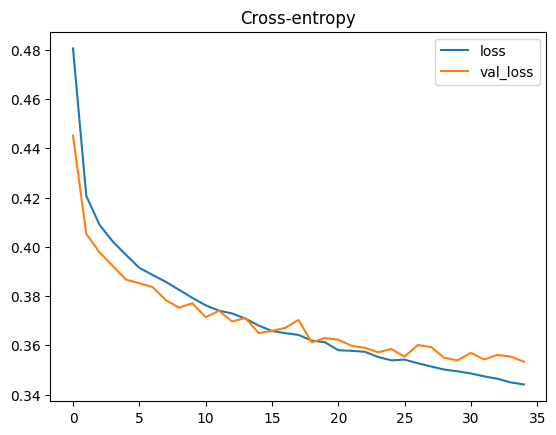

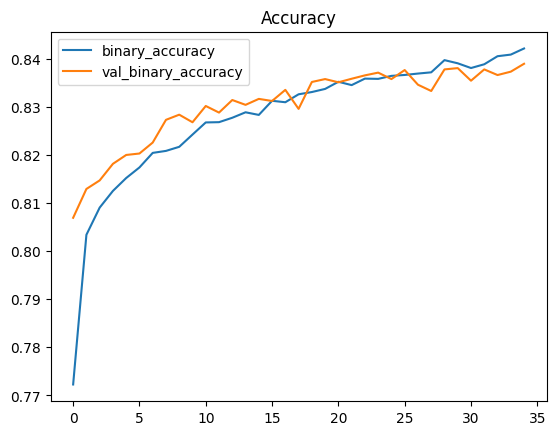

In [3]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

# 3) Train and Evaluate #


What do you think about the learning curves? Does it look like the model underfit or overfit? Was the cross-entropy loss a good stand-in for accuracy?

--->>> Though we can see the training loss continuing to fall, the early stopping callback prevented any overfitting. Moreover, the accuracy rose at the same rate as the cross-entropy fell, so it appears that minimizing cross-entropy was a good stand-in. All in all, it looks like this training was a success!